# Bayesian Linear Regression

Bayesian Linear Regression is a parametric fitting methodology, useful for modeling target values $t$ given $x$ input values.

## Model Definition

We start with a general form for the **linear regression model**:

$$ y(x, \mathbf{w}) = \sum_{j=0}^M w_j \phi_j(x) = \mathbf{w}^\top \mathbf{\phi}(x), $$

where:

- $y(x, \mathbf{w})$ is the predicted output given the input $x$ and model parameters $\mathbf{w}$,
- $\mathbf{w} = (w_0, w_1, \dots, w_M)^\top$ are the weights (model parameters),
- $\phi_j(x)$ are the basis functions that map the input $x$ into a new feature space (e.g., polynomial features).

The **target values** $t$ are modeled as:

$$ t = y(x, \mathbf{w}) + \epsilon, $$

where $\epsilon$ is the additive noise, typically assumed to be Gaussian with mean 0 and variance $\frac{1}{\beta}$, i.e., $\epsilon \sim \mathcal{N}(0, \frac{1}{\beta})$.

## Bayesian Framework

In Bayesian linear regression, we infer a **posterior distribution** over the parameters $\mathbf{w}$, rather than just finding a point estimate. We achieve this by using Bayes' theorem:

$$ p(\mathbf{w} | \mathbf{t}) \propto p(\mathbf{t} | \mathbf{w}) p(\mathbf{w}), $$

where:

- $p(\mathbf{w} | \mathbf{t})$ is the posterior distribution of the parameters given the data,
- $p(\mathbf{t} | \mathbf{w})$ is the likelihood of the data given the parameters,
- $p(\mathbf{w})$ is the prior distribution of the parameters.

### Closed-form Solution

We assume a **Gaussian prior** over the weights:

$$ p(\mathbf{w}) = \mathcal{N}(\mathbf{w} | 0, \alpha^{-1}\mathbf{I}), $$

where $\alpha$ is the precision (inverse variance) of the prior.

The **likelihood** is also Gaussian, given by:

$$ p(\mathbf{t} | \mathbf{w}) = \mathcal{N}(\mathbf{t} | \mathbf{\Phi} \mathbf{w}, \beta^{-1}\mathbf{I}), $$

where $\mathbf{\Phi}$ is the design matrix formed by the basis functions $\phi_j(x_n)$, and $\beta$ is the precision of the noise.

The posterior distribution over $\mathbf{w}$ is then Gaussian with the following closed-form solution for the mean $\mathbf{m}_N$ and covariance $\mathbf{S}_N$:

$$ \mathbf{m}_N = \beta \mathbf{S}_N \mathbf{\Phi}^\top \mathbf{t}, $$

$$ \mathbf{S}_N^{-1} = \alpha \mathbf{I} + \beta \mathbf{\Phi}^\top \mathbf{\Phi}, $$

where:

- $\mathbf{m}_N$ is the mean of the posterior distribution,
- $\mathbf{S}_N$ is the covariance matrix of the posterior distribution.

### Posterior Estimation

To derive the posterior distribution, we aim to maximize the log posterior $\ln p(\mathbf{w} | \mathbf{t})$. The log posterior is given by:

$$ \ln p(\mathbf{w} | \mathbf{t}) = - \frac{\beta}{2} \sum_{n=1}^N \left( t_n - \mathbf{w}^\top \phi(x_n) \right)^2 - \frac{\alpha}{2} \mathbf{w}^\top \mathbf{w} + \text{const}. $$

Here:

- The first term corresponds to the negative log-likelihood, which measures the fit of the model to the data,
- The second term is the negative log-prior, which regularizes the model parameters.

Maximizing this log-posterior leads to the closed-form solutions for $\mathbf{m}_N$ and $\mathbf{S}_N$ as derived above.

The advantage of the Bayesian Linear Regression approach, in contrast to other methods like Maximum Likelihood estimation is that we don't need overcomplicated models and, in general, is good to avoid overfitting. 


## Toy Data: Simulating Emission Line in Galaxy Spectra

In this section, we will create synthetic data using a combination of three Gaussian distributions. These Gaussians will mimic the H-alpha emission line typically seen in galaxy spectra. 
The functional form of a Gaussian is given by:

$$ f(x; \mu, \sigma) = A \cdot \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right), $$

where:

- $A$ is the amplitude of the Gaussian,
- $\mu$ is the mean (center) of the peak,
- $\sigma$ is the standard deviation (width) of the Gaussian.

We will combine three Gaussians with different centers, amplitudes, and widths to resemble a spectral line profile. Finally, we add some noise to simulate observational uncertainties.


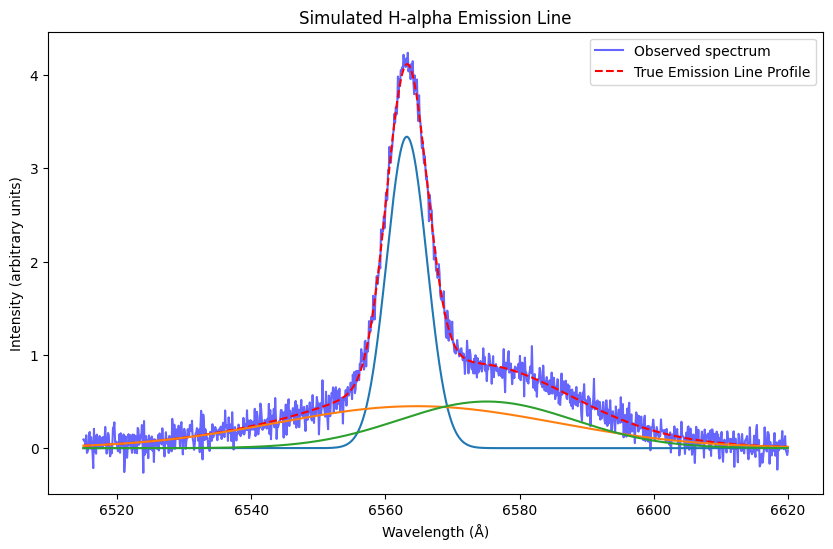

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
import pandas as pd

# Gaussian function
def gaussian(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))

# Generate x-axis values (wavelengths)
x = np.linspace(6515, 6620, 1000)  # Wavelength range (in Ångströms)

# Parameters for the three Gaussians
amp1, mu1, sigma1 = 3.34, 6563.2, 3.0  # First Gaussian (small peak)
amp2, mu2, sigma2 = 0.45, 6564.7, 20.8  # Second Gaussian (main emission line)
amp3, mu3, sigma3 = 0.5, 6575.1, 13  # Third Gaussian (smaller peak)


# Individual Gaussians
gauss1 = amp1*gaussian(x, mu1, sigma1)
gauss2 = amp2*gaussian(x, mu2, sigma2)
gauss3 = amp3*gaussian(x, mu3, sigma3)

# Create toy data (sum of three Gaussians)
y = gauss1 + gauss2 + gauss3

# Add noise to simulate observational data
noise_level = 0.1
noise = np.random.normal(0, noise_level, x.shape)
# Target values
t = y + noise

# Plot the toy data
plt.figure(figsize=(10, 6))
plt.plot(x, t, label='Observed spectrum', color='blue', alpha=0.6)
plt.plot(x, y, label='True Emission Line Profile', color='red', linestyle='--')
plt.plot(x, gauss1,  linestyle='-')
plt.plot(x, gauss2,  linestyle='-')
plt.plot(x, gauss3,  linestyle='-')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Intensity (arbitrary units)')
plt.title('Simulated H-alpha Emission Line')
plt.legend()
plt.show()


Estimated amplitudes: [3.34898005 0.45247642 0.4989828 ]


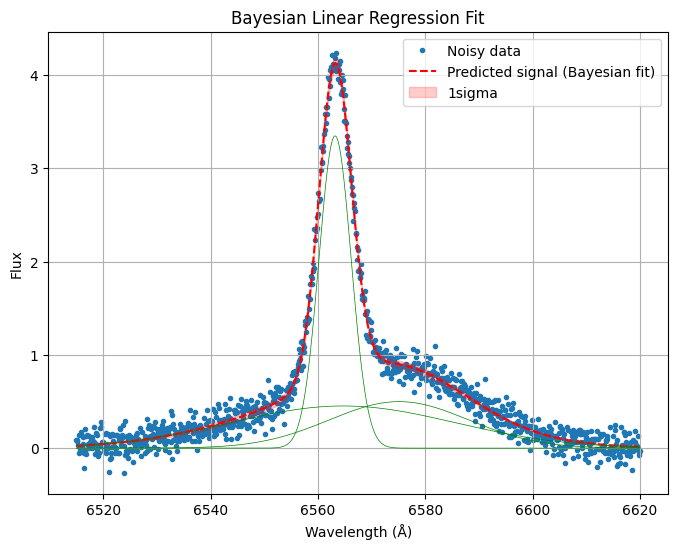

In [47]:
# Design matrix using the Gaussian basis functions (Φ)
mu_values = [mu1, mu2, mu3]  # Means for the three Gaussians
sigma_values = [sigma1, sigma2, sigma3]      # Standard deviations for the three Gaussians

# Construct design matrix Φ
Phi = np.column_stack([gaussian(x, mu, sigma) for mu, sigma in zip(mu_values, sigma_values)])

# Set the priors
alpha = 0.1  # Precision of prior (inverse of prior variance)
beta = 1 / noise_level**2  # Precision of the noise

# Compute the posterior mean (mN) and covariance (SN)
S_N_inv = alpha * np.eye(Phi.shape[1]) + beta * Phi.T @ Phi
S_N = np.linalg.inv(S_N_inv)
m_N = beta * S_N @ Phi.T @ t
std_dev_param = np.sqrt(np.diag(S_N))

# Predicted amplitudes (posterior mean)
print("Estimated amplitudes:", m_N)

# Compute the posterior predictions
pred_mean = Phi @ m_N
pred_cov = Phi @ S_N @ Phi.T
std_dev = np.sqrt(np.diag(pred_cov))

# Plot the fit
plt.figure(figsize=(8, 6))
plt.plot(x, t, '.', label='Noisy data', zorder=0)
plt.plot(x, pred_mean, label='Predicted signal (Bayesian fit)', linestyle='--', color='red')
for i in range(len(m_N)):
    gauss = gaussian(x, mu=mu_values[i], sigma=sigma_values[i])
    err = std_dev_param[i]
    plt.plot(x, m_N[i]*gauss, color='green', linewidth=0.5, zorder=4)
    # Uncomment next line to plot 1-sigma uncertainties of the individual gaussians
    # plt.fill_between(x, (m_N[i]-err)*gauss, (m_N[i]+err)*gauss, alpha=0.2, zorder=3, color='green')
plt.fill_between(x, pred_mean+5*std_dev, pred_mean-5*std_dev, color='r', label='1sigma', alpha=0.2, zorder=3)
plt.title('Bayesian Linear Regression Fit')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


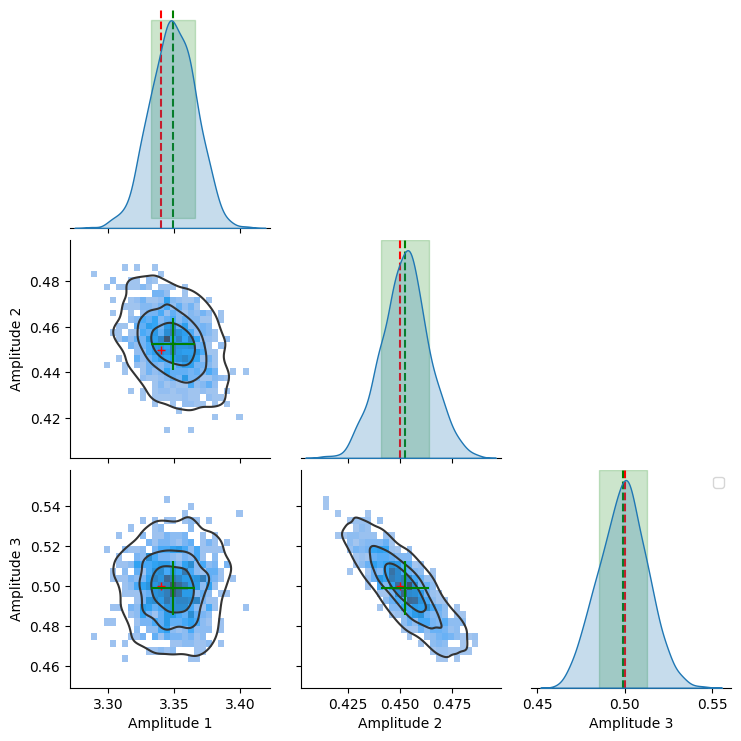

In [52]:
# Number of samples to draw from the posterior distribution
n_samples = 1000

# Draw samples from the multivariate normal distribution
samples = np.random.multivariate_normal(mean=m_N, cov=S_N, size=n_samples)
df_samples = pd.DataFrame(samples, columns=['Amplitude 1', 'Amplitude 2', 'Amplitude 3'])


# Samples plots
g = sns.pairplot(df_samples, diag_kind="kde", corner=True, kind='hist')
g.map_lower(sns.kdeplot, levels=4, color=".2")

true_values = [amp1, amp2, amp3]


# Add point values
for i, true_val in enumerate(true_values):
    ax = g.axes[i, i]
    
    # Vertical line on the diagonal
    ax.axvline(true_val, color='red', linestyle='--', label='True Value')
    ax.axvline(m_N[i], color='green', linestyle='--', label='Calculated Value')
    
    # yy = np.linspace(0, 1, 10)
    # ax.fill_betweenx(yy, m_N[i]-std_dev_param[i], m_N[i]+std_dev_param[i], alpha=0.2)
    # Annotate on the histograms
    # ax.text(true_val, ax.get_ylim()[1] * 0.9, f'{true_val:.2f}', color='red', 
    #         ha='center', va='center', fontsize=10, weight='bold')
    # Fill the 1-sigma range around the calculated value using fill_betweenx
    x_min, x_max = ax.get_xlim()  # Get the current x-axis limits
    y_min, y_max = ax.get_ylim()  # Get the current y-axis limits for the KDE or histogram

    # Generate y-values for filling within the current y-axis range
    yy = np.linspace(y_min, y_max, 100)
    
    # Fill 1-sigma error region
    ax.fill_betweenx(yy, m_N[i] - std_dev_param[i], m_N[i] + std_dev_param[i], color='green', alpha=0.2, label='1-sigma range')


# Add the true values to the off-diagonal scatter plots
for i in range(len(true_values)):
    for j in range(i):
        ax = g.axes[i, j]
        
        # Plot the true values as a red point
        ax.plot(true_values[j], true_values[i], 'r+', label='True Value')
        ax.errorbar(m_N[j], m_N[i], xerr=std_dev_param[j], yerr=std_dev_param[i], color='g', label='Calculated value')

# Show the legend for true values
plt.legend(loc='upper right')
plt.show()

